## Cannonball!

We will model a cannonball shot from a cannon on level ground. In the following the notation uses $\dot x$ to indicate time derivative. So $v_x = \dot x$, $v_y = \dot y$, $a_x = \ddot x$, $a_y = \ddot y$.
<br><br>
The air resistance on a moving sphere of mass $m$ and radius $R$ in air of density $\rho$ is a force in the opposite direction to the motion with magnitude
$$F_d=\frac{\pi R^2 \rho C}{2m} |v|^2$$
Where $C$ is the drag coefficient. We can write this in vector form as
$$ \vec F_d = -\frac{\pi R^2 \rho C}{2m} |v| \vec v$$
Letting $\vec v = \hat i \dot x + \hat j \dot y$ this becomes
$$ \vec F_d = -\frac{\pi R^2 \rho C}{2m} \sqrt{\dot y^2 + \dot y^2}\vec v$$
where R is the sphere’s radius, ρ is the density of air, v is the velocity, and C is the so-calledcoefficient of drag (a property of the shape of the moving object, in this case a sphere).
<br><br>
Using the above Newton’s second law, $\vec F = m \vec a$, the equations of motion for the position $(x, y)$ of the cannonball can be written as
$$\ddot x = -\frac{\pi R^2 \rho C}{2m}\dot x \sqrt{\dot x^2 + \dot y^2}$$
$$\ddot y = -g-\frac{\pi R^2 \rho C}{2m}\dot x \sqrt{\dot y^2 + \dot y^2}$$
Change these two second-order equations into four first-order equations as we did in class, then write a program that solves the equations for a cannonball of mass 1 kg and radius 0.08 m, shot at 30° to the horizontal ($\pi/6$ radians) with initial velocity $100\ m/s$. Assume the cannonball leaves the cannon at the origin ($x_0=y_0=0$). The density of air is $\rho = 1.22\ kg\ m^{−3}$ and the coefficient of drag for a sphere is C = 0.47. Make a plot of the trajectory of the cannonball (i.e., a graph of y as a function of x).

In python, start with the lotke program below from the previous assignment. You will have four variables, x, xdot, y, ydot. The rate function will return an array with the four derivatives of each of these. 

The initial condition array will contain the four initial values -- specify xdot0 and ydot0 in terms of the scalar velocity and angle. 
http://faculty.washington.edu/salathe/BPHYS450/PYTHON/lotka.py

In [1]:
from scipy.integrate import odeint
from numpy import linspace,array, pi, sin, cos


Define some parameters

In [2]:
R = 0.08
m = 1
rho = 1.22
C = 0.47
g = 9.81

Define the differential equation

In [3]:
def cannonball(t, V):

# unpack
    x = V[0]
    xdot = V[1]
    y = V[2]
    ydot = V[3]
        
        # a= 0.1*(1 + .5*sin(2*pi*t/365)) # allow annual cycle in rabbit growth
        
        # compute rates
    dx = xdot
    dxdot = -pi*R**2*rho*C/(2*m) * xdot * sqrt(xdot**2 + ydot**2)
    
    dy = ydot
    dydot = -g - pi*R**2*rho*C/(2*m) * ydot * sqrt(xdot**2 + ydot**2)

        
    # pack rates into numpy arrray
    rate = array([dx,dxdot,dy,dydot])
    return rate

Run for 7 seconds with initial speed of 100 m/s at a 30° angle ($\pi/6$ rad).

Text(0, 0.5, 'Vertical Displacement (m)')

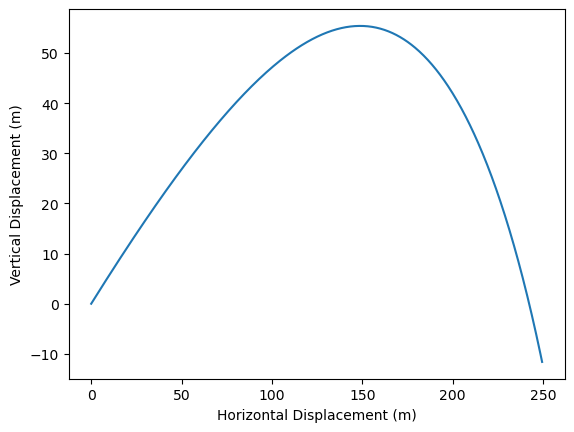

In [4]:
x0 = 0
y0 = 0
v0 = 100
angle = pi/6

xdot0=cos(angle)*v0
ydot0=sin(angle)*v0

V0 = array([x0,xdot0, y0,ydot0])

# Form Time array
Tstart=0
Tend = 7


T = linspace(Tstart,Tend,500)

# solve the ODE
X = odeint(cannonball, V0, T, tfirst=True)

# Plot trajextory

x=X[:,0]
y=X[:,2]
plot(x,y)
xlabel('Horizontal Displacement (m)')
ylabel('Vertical Displacement (m)')

